<a href="https://colab.research.google.com/github/seong-eun822/setting/blob/main/%ED%8C%80%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("pima-indians-diabetes.csv", encoding='cp949')

In [ ]:
data

,임신,포도당,혈압,피부두꼐,인슐린,체질량지수,당뇨병혈통기능,나이,양/음
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   임신       768 non-null    int64  
 1   포도당      768 non-null    int64  
 2   혈압       768 non-null    int64  
 3   피부두꼐     768 non-null    int64  
 4   인슐린      768 non-null    int64  
 5   체질량지수    768 non-null    float64
 6   당뇨병혈통기능  768 non-null    float64
 7   나이       768 non-null    int64  
 8   양/음      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,임신,포도당,혈압,피부두꼐,인슐린,체질량지수,당뇨병혈통기능,나이,양/음
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.drop(columns='인슐린', inplace=True, axis=1)

In [ ]:
data

,임신,포도당,혈압,피부두꼐,체질량지수,당뇨병혈통기능,나이,양/음
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [ ]:
data.corr()

,임신,포도당,혈압,피부두꼐,체질량지수,당뇨병혈통기능,나이,양/음
임신,1.000000,0.129459,0.141282,-0.081672,0.017683,-0.033523,0.544341,0.221898
포도당,0.129459,1.000000,0.152590,0.057328,0.221071,0.137337,0.263514,0.466581
혈압,0.141282,0.152590,1.000000,0.207371,0.281805,0.041265,0.239528,0.065068
피부두꼐,-0.081672,0.057328,0.207371,1.000000,0.392573,0.183928,-0.113970,0.074752
체질량지수,0.017683,0.221071,0.281805,0.392573,1.000000,0.140647,0.036242,0.292695
당뇨병혈통기능,-0.033523,0.137337,0.041265,0.183928,0.140647,1.000000,0.033561,0.173844
나이,0.544341,0.263514,0.239528,-0.113970,0.036242,0.033561,1.000000,0.238356
양/음,0.221898,0.466581,0.065068,0.074752,0.292695,0.173844,0.238356,1.000000


In [ ]:
data

,임신,포도당,혈압,피부두꼐,체질량지수,당뇨병혈통기능,나이,양/음
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [ ]:
data.drop(columns='피부두꼐', inplace=True, axis=1)
data.drop(columns='혈압', inplace=True, axis=1)

In [ ]:
data

,임신,포도당,체질량지수,당뇨병혈통기능,나이,양/음
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1
...,...,...,...,...,...,...
763,10,101,32.9,0.171,63,0
764,2,122,36.8,0.340,27,0
765,5,121,26.2,0.245,30,0
766,1,126,30.1,0.349,47,1


In [ ]:
x= data.iloc[:,0:5]
y=data.iloc[:,5]

In [ ]:
x

,임신,포도당,체질량지수,당뇨병혈통기능,나이
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
4,0,137,43.1,2.288,33
...,...,...,...,...,...
763,10,101,32.9,0.171,63
764,2,122,36.8,0.340,27
765,5,121,26.2,0.245,30
766,1,126,30.1,0.349,47


In [ ]:
y

,양/음
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.05, random_state=42)

In [ ]:
import tensorflow as tf
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5636 - loss: 1.6613
Epoch 2/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6352 - loss: 0.8180
Epoch 3/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6022 - loss: 0.7867
Epoch 4/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6336 - loss: 0.7423
Epoch 5/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5687 - loss: 0.7512
Epoch 6/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6372 - loss: 0.6839
Epoch 7/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6337 - loss: 0.6701
Epoch 8/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6880 - loss: 0.6319
Epoch 9/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6620 - loss: 0.6416
Epoch 10/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6527 - loss: 0.6327
Epoch 11/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6880 - loss: 0.6316
Epoch 12/50
729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

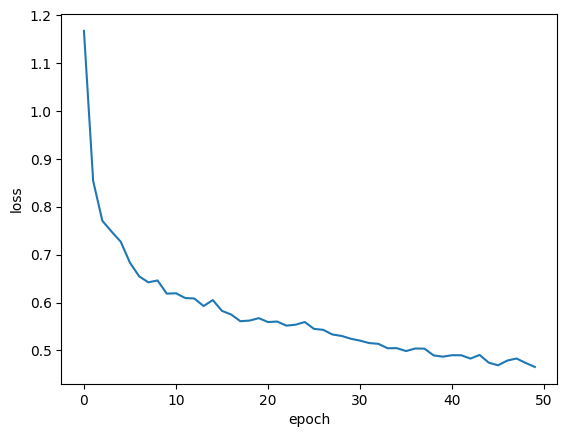

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

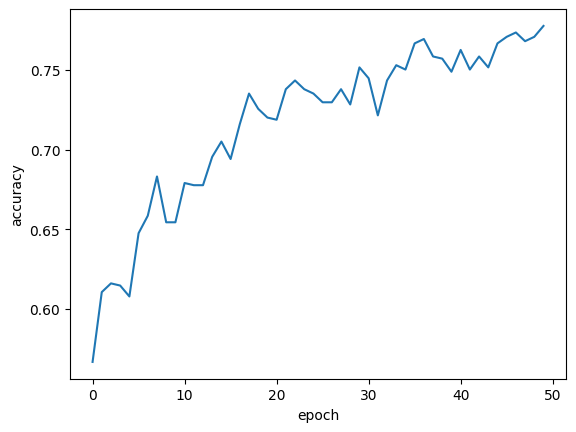

In [ ]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()